# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Fariz Eda Andhika
- **Email:** farizedaa@gmail.com
- **ID Dicoding:** farizeda

## Menentukan Pertanyaan Bisnis

- What are the top-selling product categories?

- Which sellers have the highest sales volume?


## Import Semua Packages/Library yang Digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel sellers_df, order_items_df, products_df, product_category_translation_df

In [41]:
# For Business Question 1
order_items_df = pd.read_csv('order_items_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
product_category_translation_df= pd.read_csv('product_category_name_translation.csv')

# For Business Question 2
sellers_df = pd.read_csv('sellers_dataset.csv')

Head() untuk masing-masing df

In [42]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [43]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [44]:
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [45]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai order_items_df


Melakukan assessment terhadap masing-masing df menggunakan method info()

In [46]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Konsisten pada jumlah non-null count, namun terdapat kesalahan tipe object pada 'shipping_limit_data' yang seharusnya berupa date_time, bukan object.

Pengechekkan missing values

In [47]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tampak tidak ada missing values, lanjut ke pengecekkan nilai duplikat:

In [48]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [49]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Tidak ada kejanggalan values

#### Menilai products_df

In [50]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terlihat terdapat perbedaan jumlah non-null untuk beberapa kolom.

In [51]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Ternyata terdapat beberapa kolom yang memiliki banyak missing values.

In [52]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi pada df ini

In [53]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Tidak ada kejanggalan values

#### Menilai product_category_translation_df

In [54]:
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Konsisten pada jumlah non-null dan tidak ada keanehan pada Dtype

In [55]:
product_category_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak ada missing values

In [56]:
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikat

In [57]:
product_category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Karena semua atribute kategorikal dapat dilanjutkan

#### Menilai sellers_df

In [58]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Konsisten pada jumlah nilai null, dan Dtype tampak sesuai

In [59]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak ada missing values

In [60]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikat

In [61]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Mengetahui domain dari data tersebut, dapat diasumsikan tidak ada kejanggalan dari zip code tersebut

### Cleaning Data

#### Membersihkan order_items_df


Mengubah object menjadi dateTime

In [62]:
column = "shipping_limit_date"
order_items_df[column] = pd.to_datetime(order_items_df[column])

Pengechekkan

In [63]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Dapat terlihat bahwa tipe data sudah berupa menjadi datetime64[ns]

In [64]:
order_items_df.to_csv('cleaned_order_items.csv', index=False)

#### Membersihkan products_df

Drop missing rows

In [65]:
# Dropping rows with missing 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'
products_df = products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])


Impute by using median

In [66]:
for column in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    products_df[column].fillna(products_df[column].median(), inplace=True)

<ipython-input-66-bf62c5073050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df[column].fillna(products_df[column].median(), inplace=True)
<ipython-input-66-bf62c5073050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df[column].fillna(products_df[column].median(), inplace=True)
<ipython-input-66-bf62c5073050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df[column].fillna(products_df[column].median(

Pengechekkan

In [67]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Dataset sudah terlihat bersih :D

## Exploratory Data Analysis (EDA)

Pertama, kita akan menggabungkan order_items_dataset dengan product_dataset untuk mendapatkan informasi kategori produk untuk setiap item pesanan.

In [68]:
order_items_products_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


karena masih dalam berbentuk kode (tidak terlalu insightful), maka sebaiknya ditambahkan translasi terlebih dahulu

In [69]:
order_items_products_translated_df = pd.merge(
    order_items_products_df,
    product_category_translation_df,
    left_on='product_category_name',
    right_on='product_category_name',
    how='left'
)

order_items_products_translated_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


Setelah ini, akan melakukan agregat sales volume terhadap kategori

In [70]:
sales_volume_by_category = order_items_products_translated_df.groupby('product_category_name_english')['price'].sum().reset_index()

Sekarang melakukan sorting untuk melihat top nya

In [71]:
top_selling_categories = sales_volume_by_category.sort_values(by='price', ascending=False)

top_selling_categories.head()

,product_category_name_english,price
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32


Selanjutnya, akan mengeksplorasikan Which sellers have the highest sales volume?

Menghitung sales volume dari setip seller

In [72]:
sales_volume = order_items_df.groupby('seller_id')['price'].sum().reset_index()

Memperoleh top sellers dengan sorting

In [73]:
top_sellers = sales_volume.sort_values('price', ascending=False)

In [74]:
top_sellers.head()

,seller_id,price
857,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1013,53243585a1d6dc2643021fd1853d8905,222776.05
881,4a3ca9315b744ce9f8e9374361493884,200472.92
3024,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
1535,7c67e1448b00f6e969d365cea6b010ab,187923.89


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-75-90fb468c7bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="product_category_name_english", data=top_5_categories, palette=colors)


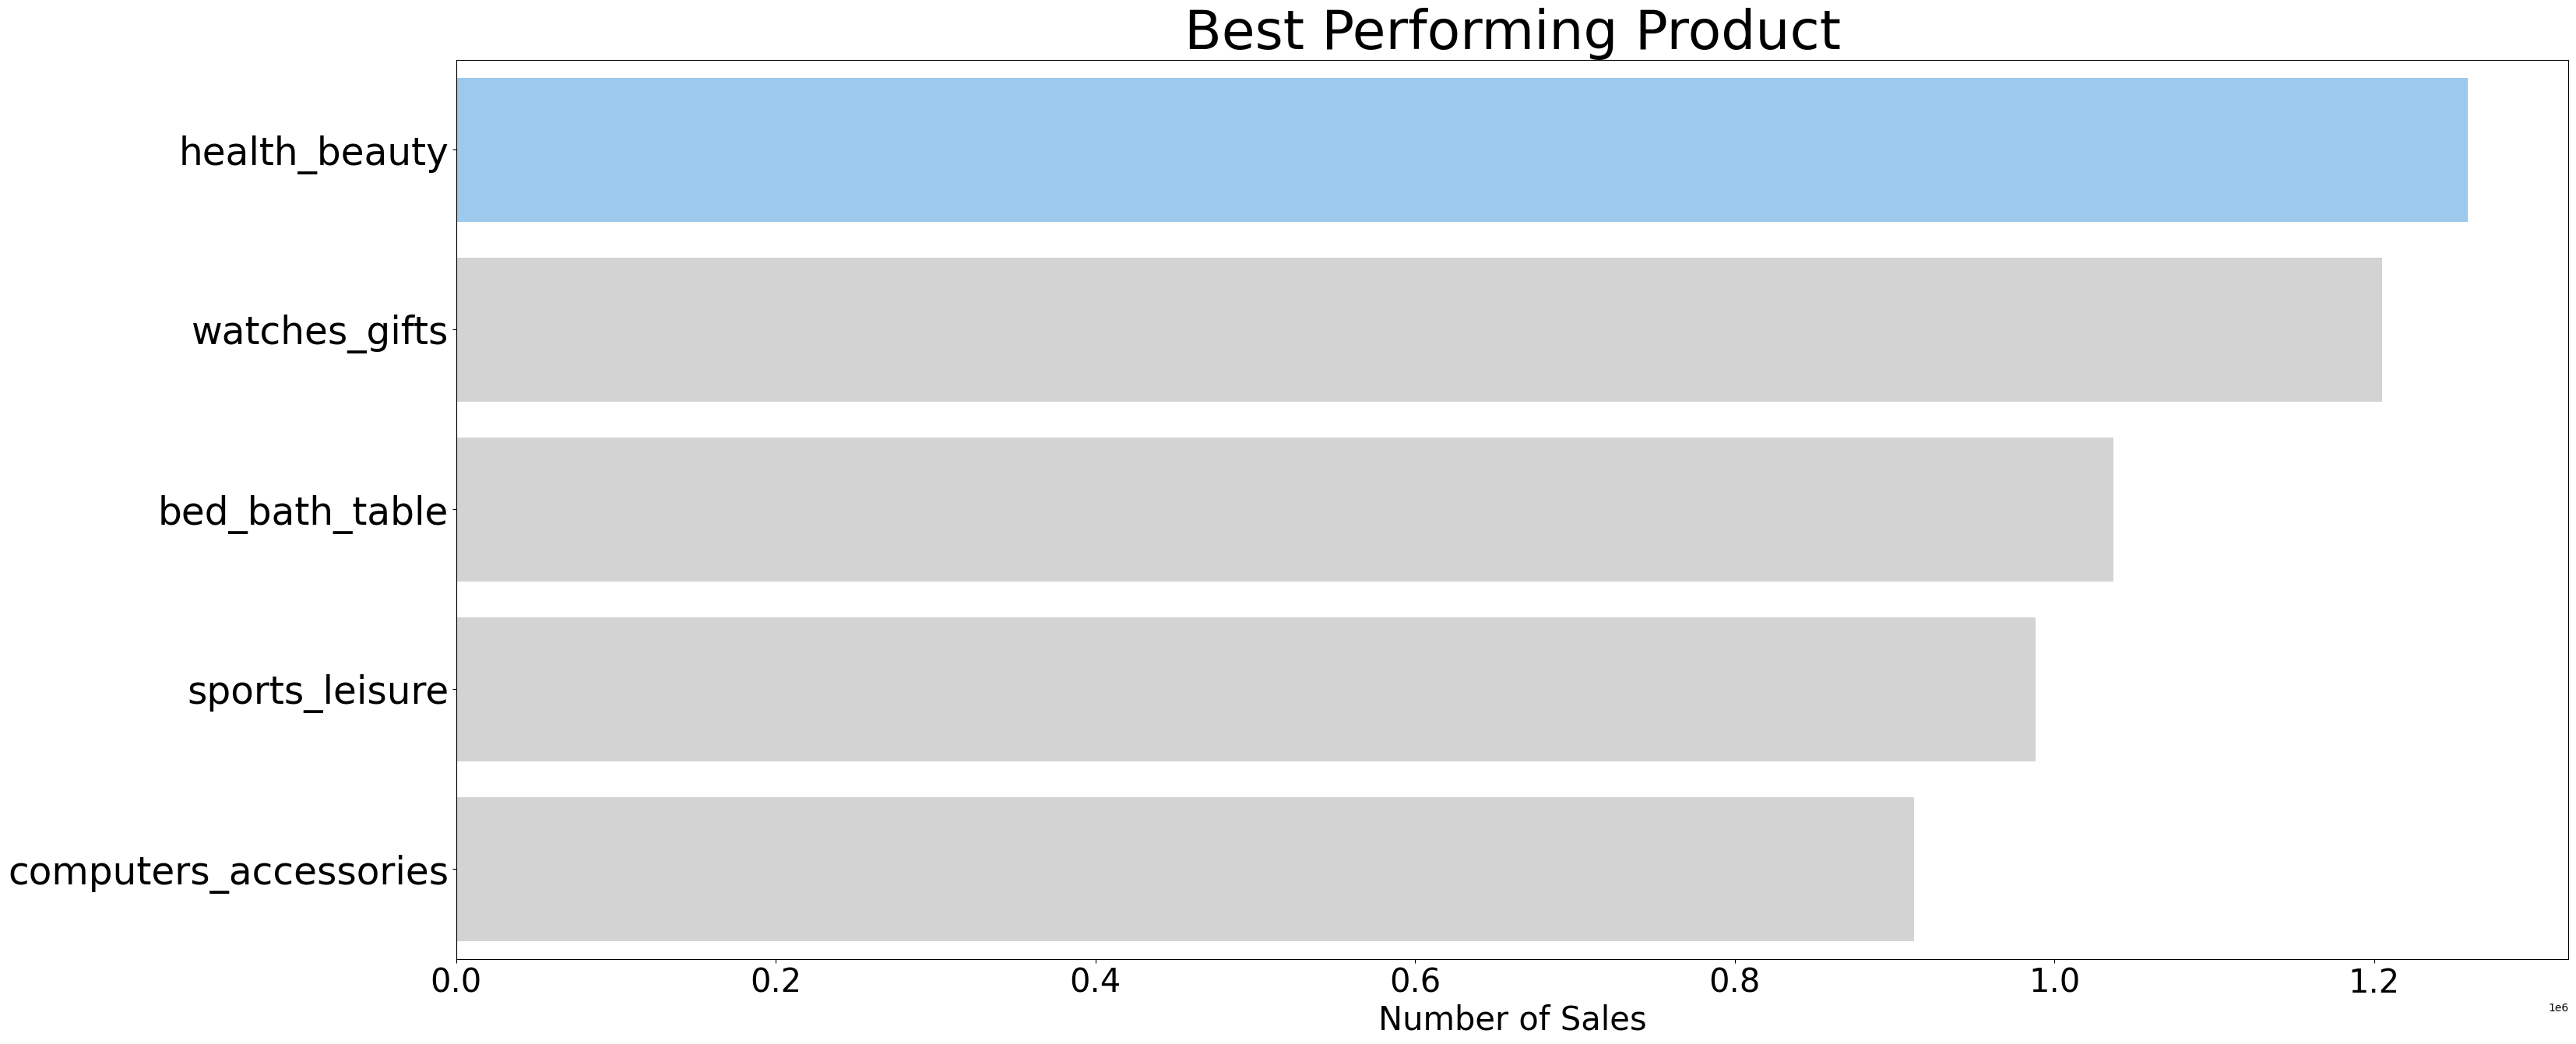

In [75]:

top_5_categories = top_selling_categories.head()
fig, ax = plt.subplots(figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price", y="product_category_name_english", data=top_5_categories, palette=colors)
ax.set_ylabel(None)
ax.set_xlabel("Number of Sales", fontsize=30)
ax.set_title("Best Performing Product", loc="center", fontsize=50)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=30)


### Pertanyaan 2:

<ipython-input-76-fed2230306d3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="seller_id", data=top_5_sellers, palette=colors)


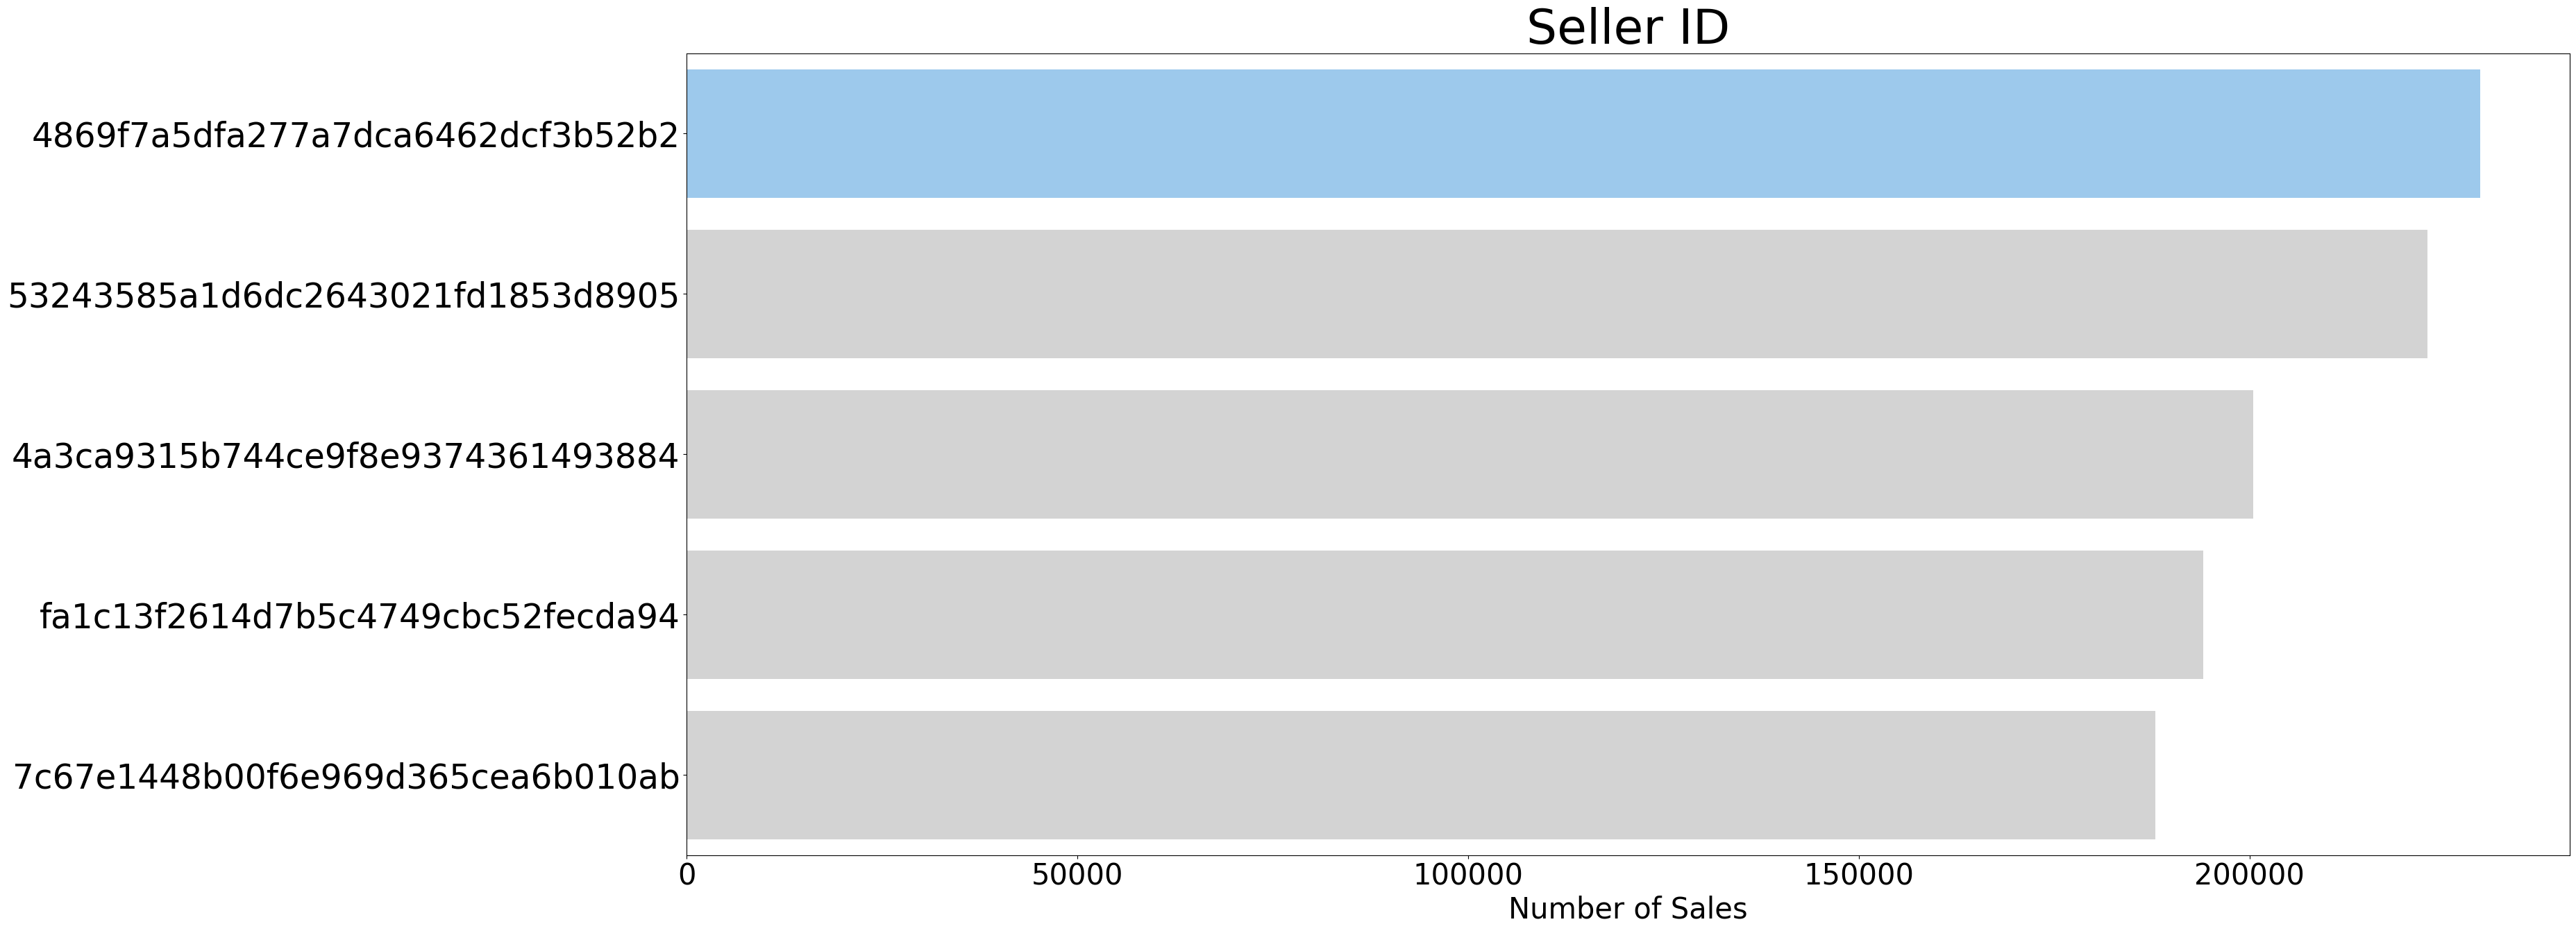

In [76]:
# Extract top 5 sellers for visualization
top_5_sellers = top_sellers.head()
fig, ax = plt.subplots(figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price", y="seller_id", data=top_5_sellers, palette=colors)
ax.set_ylabel(None)
ax.set_xlabel("Number of Sales", fontsize=30)
ax.set_title("Seller ID", loc="center", fontsize=50)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=30)


## Conclusion

- Conclution pertanyaan 1
Kesimpulan dari pertanyaan satu adalah Top 5 Kategori yang memiliki volume penjualan tertinggi adalah health_beauty, watches_gifts, bed_bath_table, sport_leisure, dan computer_accessories

Jika dilihat sudut pandang bisnis, hasil top 5 kategori terbaik di atas menunjukan tingginya permintaan konsumen. Hal ini dapat menyarankan pengusaha untuk menginvestasikan tenaga atau uang mereka untuk menargetkan kepada kategori-kategori ini karena demand yang tinggi.


- Conclution pertanyaan 2
Kesimpulan dari pertanyaan kedua adalah Top 5 Seles yang menghasilkan volume penjualan tertinggi adalah

  1. 4869f7a5dfa277a7dca6462dcf3b52b2
  2. 53243585a1d6dc2643021fd1853d8905
  3. 4a3ca9315b744ce9f8e9374361493884
  4. fa1c13f2614d7b5c4749cbc52fecda94
  5. 7c67e1448b00f6e969d365cea6b010ab

Jika dilihat dari sudut pandang bisnis, mengetahui top sellers dapat memberikan kita wawasan atas bagaimana kita dapat menganalisis strategi mereka. Baik dalam segi matketing, manajemen penjualan produk, dan lain-lain. Hal ini dapat memberikan wawasan berharga untuk diterapkan ke kita untuk meningkatkan performa penjualan atau membantu mengidentifikasi SWOT dari perusahaan kita maupun mereka.

In [77]:
# Exporting

top_sellers.to_csv('top_sellers.csv', index=False)
top_selling_categories.to_csv('top_selling_categories.csv', index=False)